# Imports

In [1]:
import numpy as np

from sklearn.neighbors import BallTree
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Dataset init
Create a dummy dataset to build the ball tree on

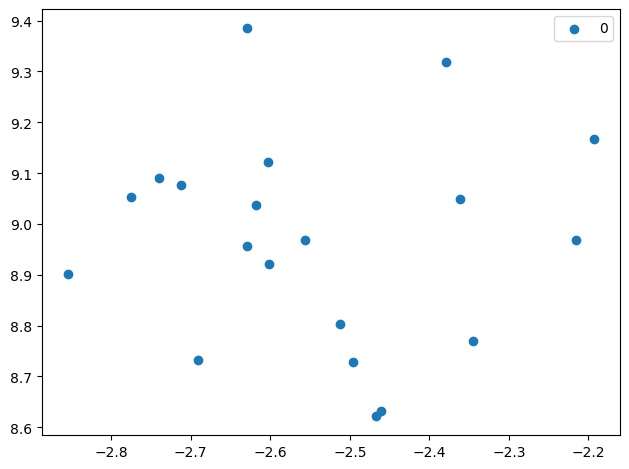

In [2]:
X, y = make_blobs(n_samples=20, centers=1, n_features=2, cluster_std=0.2, random_state=42)

for y_val in np.unique(y):
    plt.scatter(X[y == y_val, 0], X[y == y_val, 1], label = y_val)
plt.legend()
plt.tight_layout()
plt.show()

# My implementation

In [ ]:
class myBallTree():
    """
    Custom implementation of ball tree data structure

    Currently implements the furthest point algorithm for clustering
    TODO: give the choice of 2 additional algorithms:
        1. furthest 2 points given a randomly selected point
        2. 2-means clustering
    """
    valid_metric_list = ['euclidean']
    valid_metric_map = {
        'euclidean': euclidean_distances
    }
    def __init__(self, data: np.ndarray, leaf_size: int, radius_threshold: float, 
                 metric = 'euclidean'):
        """
        initialise all attributes of the ball tree, and then fit it on the given set of points
        
        Currently implements the furthest point algorithm for clustering
        TODO: give the choice of 2 additional algorithms:
            1. furthest 2 points given a randomly selected point
            2. 2-means clustering
        """
        if metric not in self.valid_metric_list:
            raise ValueError(f"Invalid metric {metric} provided")
        
        self.data = data
        self.leaf_size = leaf_size
        self.radius_threshold = radius_threshold
        self.metric = metric
        self.idx_arr = np.arange(data.shape[0])

        # this will be a tuple of the following quantities:
        # 1. node_index
        # 2. index_start
        # 3. index_end
        # 4. is_leaf
        # 5. radius
        # 6. centroid
        # 
        self.node_data = []
        self.left_children, self.right_children = [], []
        self.is_leaf = []

        self.fit()
    
    def fit(self):
        """
        Currently implements the furthest point algorithm for clustering
        TODO: give the choice of 2 additional algorithms:
            1. furthest 2 points given a randomly selected point
            2. 2-means clustering
        """
        node_idx_counter = 0
        
        # start from root node, storing each node's node_index,index_start, index_end
        bfs_queue = [(0, 0, self.data.shape[0])]

        self.valid_metric_map[self.metric]

        while bfs_queue:
            curr_node = bfs_queue.pop(0)
            idx_start, idx_end = curr_node[1], curr_node[2]

            if idx_end - idx_start <= self.leaf_size:
                # current node has at most self.leaf_size items, shouldn't be split further
                continue
            
            p1_idx = self.idx_arr[self.np.random.uniform(low=idx_start, high=idx_end)]
            dist_from_p1 = self.valid_metric_map[self.metric](
                np.broadcast_to(self.data[p1_idx], 
                                shape=self.idx_arr[self.data[idx_start: idx_end]].shape),
                self.idx_arr[self.data[idx_start: idx_end]]
            )[0]
            p2_idx = self.idx_arr[idx_start+np.argmax(dist_from_p1)]

            dist_from_p2 = self.valid_metric_map[self.metric](
                np.broadcast_to(self.data[p2_idx], 
                                shape=self.idx_arr[self.data[idx_start: idx_end]].shape),
                self.idx_arr[self.data[idx_start: idx_end]]
            )[0]

            
            

# Scikit-learn BallTree
Compare with ball tree from scikit-learn

## EDA

In [3]:
sklearn_bt = BallTree(data = X, leaf_size=5, metric = "euclidean")

In [90]:
dir(sklearn_bt)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_update_sample_weight',
 'data',
 'get_arrays',
 'get_n_calls',
 'get_tree_stats',
 'idx_array',
 'kernel_density',
 'node_bounds',
 'node_data',
 'query',
 'query_radius',
 'reset_n_calls',
 'sample_weight',
 'sum_weight',
 'two_point_correlation',
 'valid_metrics']

In [91]:
sklearn_bt.get_arrays()

(array([[-2.62953895,  9.38474177],
        [-2.77483483,  9.05365838],
        [-2.19335506,  9.16777307],
        [-2.6030925 ,  9.12279814],
        [-2.46080517,  8.63163008],
        [-2.34468864,  8.7701174 ],
        [-2.85418119,  8.90182862],
        [-2.61807417,  9.03647065],
        [-2.37965992,  9.3188921 ],
        [-2.49569198,  8.72933649],
        [-2.69080244,  8.73182539],
        [-2.21606787,  8.96913087],
        [-2.4674249 ,  8.6223521 ],
        [-2.60188116,  8.92114018],
        [-2.5560283 ,  8.96745874],
        [-2.73939634,  9.08942573],
        [-2.51189707,  8.80274394],
        [-2.36150431,  9.04855978],
        [-2.62932536,  8.95594738],
        [-2.71176385,  9.07713559]]),
 array([10, 12,  9, 16,  4,  5,  6, 13, 18, 14, 11,  7, 17,  1, 19, 15,  8,
         3,  2,  0]),
 array([( 0, 20, 0, 0.42862758), ( 0, 10, 1, 0.30899213),
        (10, 20, 1, 0.34484627)],
       dtype=[('idx_start', '<i8'), ('idx_end', '<i8'), ('is_leaf', '<i8'), ('radius', '

In [92]:
type(sklearn_bt.get_arrays())

tuple

In [93]:
len(sklearn_bt.get_arrays())

4

In [94]:
sklearn_bt.get_arrays()[0].shape

(20, 2)

so the first element of `sklearn_bt.get_arrays()` is the data itself, which is the same as `sklearn_bt.data.base`

In [95]:
sklearn_bt.get_arrays()[1]

array([10, 12,  9, 16,  4,  5,  6, 13, 18, 14, 11,  7, 17,  1, 19, 15,  8,
        3,  2,  0])

The second element of `sklearn_bt.get_arrays()` is the points index array, same as `sklearn_bt.idx_array.base`

In [96]:
sklearn_bt.get_arrays()[2]

array([( 0, 20, 0, 0.42862758), ( 0, 10, 1, 0.30899213),
       (10, 20, 1, 0.34484627)],
      dtype=[('idx_start', '<i8'), ('idx_end', '<i8'), ('is_leaf', '<i8'), ('radius', '<f8')])

The third element of `sklearn_bt.get_arrays()` is the ball tree itself, same as `sklearn_bt.node_data.base`

In [97]:
sklearn_bt.get_arrays()[3].shape, sklearn_bt.get_arrays()[3]

((1, 3, 2),
 array([[[-2.5420007 ,  8.96514832],
         [-2.56127262,  8.80343803],
         [-2.52272878,  9.12685861]]]))

- I suspect the no. of arrays in `sklearn_bt.get_arrays()[3][0]` and in `sklearn_bt.get_arrays()[2]` seem to be the same.
- Confirmed ⬆️

Edit: The fourth element of `sklearn_bt.get_arrays()` is the centroid points for each node of the BallTree formed, which is same as `sklearn_bt.node_bounds.base`.

In [98]:
sklearn_bt.get_arrays()[3][0].shape, sklearn_bt.get_arrays()[2].shape

((3, 2), (3,))

In [99]:
sklearn_bt.get_tree_stats()

(0, 0, 0)

## Visualize the ball tree

/var/folders/w9/wpf4tzps31g9gkyyfw7j56c00000gn/T/ipykernel_2707/4052621669.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


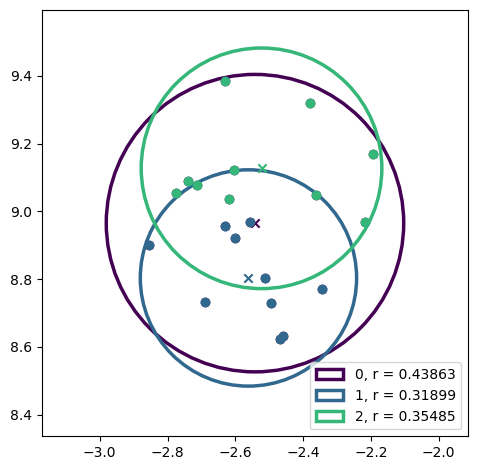

In [24]:
# Create a colormap
cmap = cm.get_cmap('viridis')

# fetch total no. of balls to draw
n_balls = sklearn_bt.node_bounds.base[0].shape[0]

for ball_idx in range(n_balls):

    # plot the ball corresponding to the ball_idx'th node
    circle = plt.Circle(
        xy = sklearn_bt.node_bounds.base[0, ball_idx],
        radius = sklearn_bt.node_data.base[ball_idx][3] + 0.01,
        label = f"{ball_idx}, r = {round(sklearn_bt.node_data.base[ball_idx][3] + 0.01, 5)}",
        color = cmap(ball_idx/n_balls),
        linewidth = 2.5,
        fill = False
    )
    plt.gca().add_patch(circle)

    # plot the members of this node
    pt_indices = sklearn_bt.idx_array.base[sklearn_bt.node_data.base[ball_idx][0]:\
            sklearn_bt.node_data.base[ball_idx][1]]

    plt.scatter(
        sklearn_bt.data.base[pt_indices][:, 0],
        sklearn_bt.data.base[pt_indices][:, 1],
        color=cmap(ball_idx/n_balls))

    # plot the centroid of this node
    plt.scatter(sklearn_bt.node_bounds.base[0, ball_idx, 0], 
                sklearn_bt.node_bounds.base[0, ball_idx, 1], 
                color=cmap(ball_idx/n_balls), 
                marker = 'x')
    
    # # DEBUG: annotate points to verify ball-relevance
    # for pt_idx in pt_indices:
    #     plt.annotate(text = f"{pt_idx}", 
    #         xy = sklearn_bt.data.base[pt_idx]
    #     )

ultimate_centroid = np.mean(sklearn_bt.data, axis=0)
data_radius = sklearn_bt.node_data.base[0][3]
delta = 0.2

xlim = (ultimate_centroid[0] - data_radius - delta,
        ultimate_centroid[0] + data_radius + delta)
ylim = (ultimate_centroid[1] - data_radius - delta,
        ultimate_centroid[1] + data_radius + delta)
plt.xlim(xlim);plt.ylim(ylim)

plt.gca().set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

## Stress-testing sklearn's BallTree

### Outlier-containing dataset

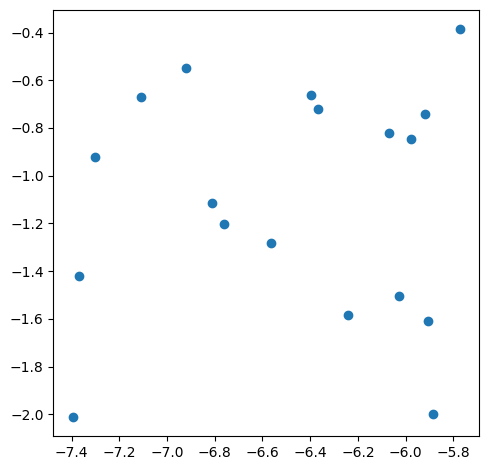

In [50]:
# initialise an 18 point dataset + add 2 distant points(these will be the outliers)
main_dataset, _ = make_blobs(n_samples=18, n_features=2, centers=1, cluster_std=0.5)

plt.scatter(main_dataset[:, 0], main_dataset[:, 1])
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

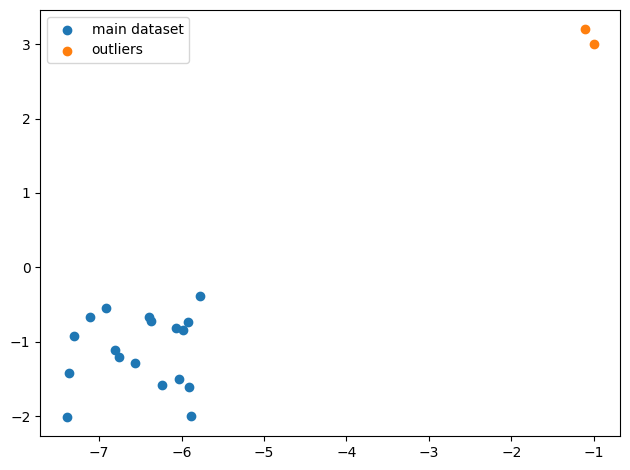

In [51]:
#  add the two distance points
new_points = np.array([[-1, 3], [-1.1,3.2]])

plt.scatter(main_dataset[:, 0], main_dataset[:, 1], label='main dataset')
plt.scatter(new_points[:, 0], new_points[:, 1], label='outliers')
plt.legend()
plt.tight_layout()
plt.show()

outlier_dataset = np.vstack([main_dataset, new_points])

In [52]:
sklearn_bt = BallTree(data = outlier_dataset, leaf_size=4, metric='euclidean')

Ball Tree:

In [56]:
sklearn_bt.get_arrays()[2]

array([( 0, 20, 0, 6.21460177), ( 0, 10, 0, 1.07623542),
       (10, 20, 0, 5.25216604), ( 0,  5, 1, 0.73342062),
       ( 5, 10, 1, 0.52803088), (10, 15, 1, 0.521015  ),
       (15, 20, 1, 3.95411925)],
      dtype=[('idx_start', '<i8'), ('idx_end', '<i8'), ('is_leaf', '<i8'), ('radius', '<f8')])

/var/folders/w9/wpf4tzps31g9gkyyfw7j56c00000gn/T/ipykernel_2707/4052621669.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


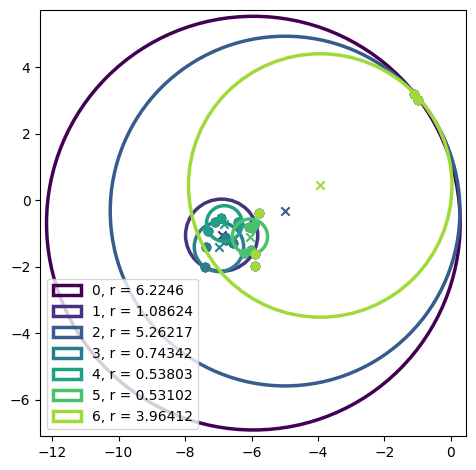

In [53]:
# Create a colormap
cmap = cm.get_cmap('viridis')

# fetch total no. of balls to draw
n_balls = sklearn_bt.node_bounds.base[0].shape[0]

for ball_idx in range(n_balls):

    # plot the ball corresponding to the ball_idx'th node
    circle = plt.Circle(
        xy = sklearn_bt.node_bounds.base[0, ball_idx],
        radius = sklearn_bt.node_data.base[ball_idx][3] + 0.01,
        label = f"{ball_idx}, r = {round(sklearn_bt.node_data.base[ball_idx][3] + 0.01, 5)}",
        color = cmap(ball_idx/n_balls),
        linewidth = 2.5,
        fill = False
    )
    plt.gca().add_patch(circle)

    # plot the members of this node
    pt_indices = sklearn_bt.idx_array.base[sklearn_bt.node_data.base[ball_idx][0]:\
            sklearn_bt.node_data.base[ball_idx][1]]

    plt.scatter(
        sklearn_bt.data.base[pt_indices][:, 0],
        sklearn_bt.data.base[pt_indices][:, 1],
        color=cmap(ball_idx/n_balls))

    # plot the centroid of this node
    plt.scatter(sklearn_bt.node_bounds.base[0, ball_idx, 0], 
                sklearn_bt.node_bounds.base[0, ball_idx, 1], 
                color=cmap(ball_idx/n_balls), 
                marker = 'x')
    
    # # DEBUG: annotate points to verify ball-relevance
    # for pt_idx in pt_indices:
    #     plt.annotate(text = f"{pt_idx}", 
    #         xy = sklearn_bt.data.base[pt_idx]
    #     )

ultimate_centroid = np.mean(sklearn_bt.data, axis=0)
data_radius = sklearn_bt.node_data.base[0][3]
delta = 0.2

xlim = (ultimate_centroid[0] - data_radius - delta,
        ultimate_centroid[0] + data_radius + delta)
ylim = (ultimate_centroid[1] - data_radius - delta,
        ultimate_centroid[1] + data_radius + delta)
plt.xlim(xlim);plt.ylim(ylim)

plt.gca().set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

Lets zoom into the inner balls

/var/folders/w9/wpf4tzps31g9gkyyfw7j56c00000gn/T/ipykernel_2707/666110466.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


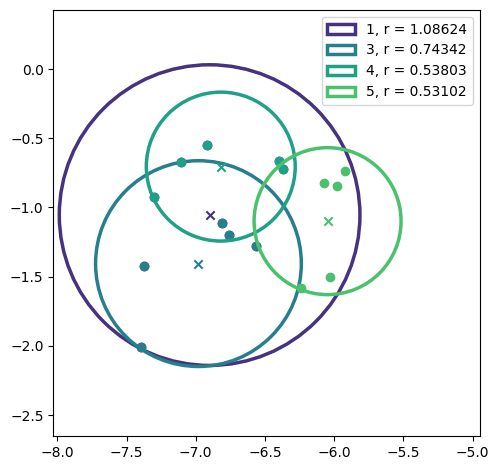

In [55]:
# Create a colormap
cmap = cm.get_cmap('viridis')

# fetch total no. of balls to draw
n_balls = sklearn_bt.node_bounds.base[0].shape[0]

for ball_idx in range(n_balls):

    ball_radius = sklearn_bt.node_data.base[ball_idx][3]
    if ball_radius < 3:

        # plot the ball corresponding to the ball_idx'th node
        circle = plt.Circle(
            xy = sklearn_bt.node_bounds.base[0, ball_idx],
            radius = sklearn_bt.node_data.base[ball_idx][3] + 0.01,
            label = f"{ball_idx}, r = {round(sklearn_bt.node_data.base[ball_idx][3] + 0.01, 5)}",
            color = cmap(ball_idx/n_balls),
            linewidth = 2.5,
            fill = False
        )
        plt.gca().add_patch(circle)

        # plot the members of this node
        pt_indices = sklearn_bt.idx_array.base[sklearn_bt.node_data.base[ball_idx][0]:\
                sklearn_bt.node_data.base[ball_idx][1]]

        plt.scatter(
            sklearn_bt.data.base[pt_indices][:, 0],
            sklearn_bt.data.base[pt_indices][:, 1],
            color=cmap(ball_idx/n_balls))

        # plot the centroid of this node
        plt.scatter(sklearn_bt.node_bounds.base[0, ball_idx, 0], 
                    sklearn_bt.node_bounds.base[0, ball_idx, 1], 
                    color=cmap(ball_idx/n_balls), 
                    marker = 'x')
        
        # # DEBUG: annotate points to verify ball-relevance
        # for pt_idx in pt_indices:
        #     plt.annotate(text = f"{pt_idx}", 
        #         xy = sklearn_bt.data.base[pt_idx]
        #     )

ultimate_centroid = np.mean(sklearn_bt.data[:18], axis=0)
data_radius = max([sklearn_bt.node_data.base[idx][3] if sklearn_bt.node_data.base[idx][3] < 1 else 0 for idx in range(n_balls)])
delta = data_radius*1.1

xlim = (ultimate_centroid[0] - data_radius - delta,
        ultimate_centroid[0] + data_radius + delta)
ylim = (ultimate_centroid[1] - data_radius - delta,
        ultimate_centroid[1] + data_radius + delta)
plt.xlim(xlim);plt.ylim(ylim)

plt.gca().set_aspect('equal')
plt.legend()
plt.tight_layout()
plt.show()

# Actual comparison with my Ball Tree